# Search multiple candidates at once

This is a tutorial for evaluating two or more candidates at once in a single search step.

## Prepare the search candidate data

As the previous tutorials, save the dataset file [s5-210.csv](https://raw.githubusercontent.com/issp-center-dev/PHYSBO/master/examples/grain_bound/data/s5-210.csv) and load dataset from this file as the following:

In [ ]:
import physbo

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def load_data():
    A =  np.asarray(np.loadtxt('s5-210.csv',skiprows=1, delimiter=',') )
    X = A[:,0:3]
    t  = -A[:,3]
    return X, t

X, t = load_data()
X = physbo.misc.centering(X)

## Definition of simulator 

If `num_search_each_probe` (described below) is set to 2 or more, action will be input as an array of action IDs.  
Thus, define the simulator to return a list of evaluation values for each action ID.

The definitions in the basic tutorial and simulator are the same, but keep in mind that t is a ``numpy.array``, and when action is an array, `self.t[action]` will also be an array.

In [2]:
class Simulator:
    def __init__( self ):
        _, self.t = load_data()
    
    def __call__( self, action ):
        return self.t[action]

Example of running the simulator

In [3]:
sim = Simulator()
sim([1,12,123])

array([-1.01487066, -1.22884748, -1.05572838])

## Performing optimizations

In [4]:
# set policy
policy = physbo.search.discrete.Policy(test_X=X)

# set seed
policy.set_seed( 0 )

`num_search_each_probe` allows you to specify the number of candidates to evaluate in each search step.

In the following example, the simulator will be evaluated 2 × 10 = 20 times by random search and 8 × 10 = 80 times by Bayesian optimization. 

**argument**.  

- `max_num_probes`: Number of search steps.  
- `num_search_each_probe`: Number of candidates to evaluate at each search step.

In [ ]:
res = policy.random_search(max_num_probes=2, num_search_each_probe=10, simulator=Simulator())

res = policy.bayes_search(max_num_probes=8, num_search_each_probe=10, simulator=Simulator(), score='EI', 
                                                  interval=2, num_rand_basis=100)

## Checking results

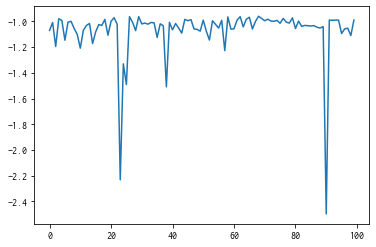

In [6]:
plt.plot(res.fx[0:res.total_num_search])

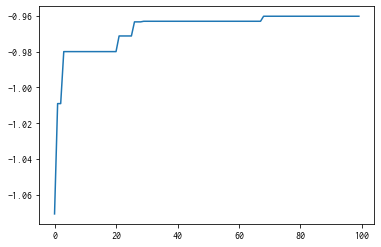

In [7]:
best_fx, best_action = res.export_all_sequence_best_fx()
plt.plot(best_fx)

With `res.export_sequence_best_fx()`, you can get the best value obtained at each step and the history of the action.  

The difference between `res.export_all_sequence_best_fx()` and `res.export_all_sequence_best_fx()` is that the information is not for each evaluation of the simulator, but for each search step.  In this case, the total number of steps is 10, and the number of evaluations is 100.

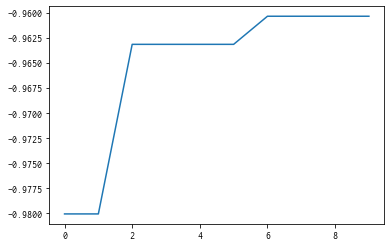

In [8]:
best_fx, best_action = res.export_sequence_best_fx()
plt.plot(best_fx)